# Question 1

## Importing Libraries

- Initially we will import all the libraries which will be used in our assignment

In [1]:
#!pip install tensorflow
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import re
import os
import nltk
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import datasets, layers, models, losses
from sklearn.svm import SVC
from wordcloud import WordCloud,STOPWORDS
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords  
from nltk import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Data Exploration and Preparation

In [2]:
# Reading the data
ens_learn = pd.read_csv('training.csv', encoding='cp1252', names = {0 : 'targets', 1 : 'ids', 2 : 'date', 3 : 'flag', 4 : 'user', 5 : 'text'})
ens_learn_copy = ens_learn
# Checking first 5 rows of data
ens_learn.columns=['target', 'ids','date','flag','user','text']
ens_learn.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


- Taking 10 percent of data from our dataset

In [3]:
ens_learn = ens_learn.sample(160000)

- 160k of data with 6 coumns

In [4]:
# Checking number of rows and columns
ens_learn.shape

(160000, 6)

In [5]:
# Names of columns
ens_learn.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
# complete information of data with datatypes of columns
ens_learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160000 entries, 248009 to 409332
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  160000 non-null  int64 
 1   ids     160000 non-null  int64 
 2   date    160000 non-null  object
 3   flag    160000 non-null  object
 4   user    160000 non-null  object
 5   text    160000 non-null  object
dtypes: int64(2), object(4)
memory usage: 8.5+ MB


In [7]:
#Checking number of null values
ens_learn.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

- There are no null values in our dataset

In [8]:
# Checking the initial date of tweets  
ens_learn['date'].min()

'Fri Apr 17 20:30:55 PDT 2009'

In [9]:
# Checking last date of tweets
ens_learn['date'].max()

'Wed May 27 07:27:38 PDT 2009'

In [10]:
# number of duplicates
print(ens_learn.duplicated().loc[lambda x : x == True].count())

0


- There are no duplicates in the dataframe

# Data Cleaning


- Now we are cleaning the data So that our models provide us with better precision and acuracy. I named and define them with what iws happening.

In [11]:

# Removing the URl

def rem_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Removing the stepwords 'english'
def rem_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Removing the html  
def rem_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_at_mentions(text):
    return re.sub(r'@\w+', '', text)


# Removing emojis by codes
def rem_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF" 
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Fixing the text
def fixing(text):
    text = re.sub(r"Mr\'s", " he is", text)
    text = re.sub(r"Mr\'.", " he is", text)
    text = re.sub(r"Ms\'.", " She ", text)
    text = re.sub(r"She\'s", " she is", text)
    text = re.sub(r"I\'m", " i am", text)
    text = re.sub(r"haven\'t", " have not", text)
    text = re.sub(r"you\'r", " you are", text)
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r" plz", " please", text)
    text = re.sub(r"it\'s", " its", text) 
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"He\'s", " he is", text)
    text = re.sub(r"in\'s", " in", text)
    return text

# Seperate alphabets
def sep_alphabets(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)


def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

ens_learn['final_text'] = ens_learn['text']

ens_learn['final_text'] = ens_learn['final_text'].astype(str).apply(remove_at_mentions)
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : rem_url(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : rem_stopwords(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : rem_html(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : rem_emoji(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : fixing(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : sep_alphabets(x))
ens_learn['final_text'] = ens_learn['final_text'].apply(lambda x : tweet_to_words(x))
ens_learn['final_text'] = ens_learn['final_text'].astype(str).replace("plz", "please", regex=True)

- After cleaning the whole data whoich we take, Now we will see the outcomes in our dataframe. We remove urls, html,emojis,make words proper So the reader and machine can read easily and separate alphabets with spaces

In [12]:
ens_learn['final_text']

248009                           also lost crazy golf today
363435                             amp lucky u get watch sd
228822    cover ridiculous someone listening charlotte m...
381593                duh dreams last night funny love miss
126844    abbe ullu ke paththe sota kyu nahi coz neend n...
                                ...                        
18780                                         oh well tried
498738                                 take waste nice legs
636842    roche last day base dont know feel ending ill ...
719717    lesson partitioned views becomes failure estab...
409332                           hit wrong button vs stupid
Name: final_text, Length: 160000, dtype: object

## Tokenization 

In [13]:
# A function for the tokenization
def tokenize(text):
  return text.split()

  # Apply the tokenization function to the 'text' column
ens_learn['new_tokens'] = ens_learn['final_text'].apply(tokenize)
ens_learn['new_tokens']

248009                     [also, lost, crazy, golf, today]
363435                      [amp, lucky, u, get, watch, sd]
228822    [cover, ridiculous, someone, listening, charlo...
381593        [duh, dreams, last, night, funny, love, miss]
126844    [abbe, ullu, ke, paththe, sota, kyu, nahi, coz...
                                ...                        
18780                                     [oh, well, tried]
498738                            [take, waste, nice, legs]
636842    [roche, last, day, base, dont, know, feel, end...
719717    [lesson, partitioned, views, becomes, failure,...
409332                     [hit, wrong, button, vs, stupid]
Name: new_tokens, Length: 160000, dtype: object

- Breaking down a larger piece of text into smaller pieces called tokens. These tokens can be individual words, phrases, symbols, or even individual characters. Tokenization allows for more accurate analysis of text data by allowing the model to focus on individual words or phrases rather than the entire document.

## Stemming 

In [14]:

snowbs = SnowballStemmer(language='english')
def stemmer(text):
    text = [snowbs.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

ens_learn['stemming'] = ens_learn['final_text'].apply(stemmer)
ens_learn['stemming']


248009                           also lost crazi golf today
363435                             amp lucki u get watch sd
228822    cover ridicul someon listen charlott make bad ...
381593                 duh dream last night funni love miss
126844    abb ullu ke pathth sota kyu nahi coz neend nah...
                                ...                        
18780                                           oh well tri
498738                                   take wast nice leg
636842    roch last day base dont know feel end ill kind...
719717    lesson partit view becom failur establish link...
409332                           hit wrong button vs stupid
Name: stemming, Length: 160000, dtype: object

- The main purpose of stemming is to reduce the dimensionality of the data by reducing the number of unique words in the text. I have made a separate column named stemming for the results and we can see the final text and the stemmed text below.

In [15]:
ens_learn

,target,ids,date,flag,user,text,final_text,new_tokens,stemming
248009,0,1982610663,Sun May 31 11:33:11 PDT 2009,NO_QUERY,PinstripeDave,@Alicebouquet also lost to @davelewistwit at c...,also lost crazy golf today,"[also, lost, crazy, golf, today]",also lost crazi golf today
363435,0,2047845844,Fri Jun 05 14:16:07 PDT 2009,NO_QUERY,TheAngryChild,"@mickie33lou &amp; @Champers4u How lucky, u ge...",amp lucky u get watch sd,"[amp, lucky, u, get, watch, sd]",amp lucki u get watch sd
228822,0,1978343369,Sat May 30 23:04:48 PDT 2009,NO_QUERY,mrmarcusw,20 for a cover is ridiculous. Is someone liste...,cover ridiculous someone listening charlotte m...,"[cover, ridiculous, someone, listening, charlo...",cover ridicul someon listen charlott make bad ...
381593,0,2052818312,Sat Jun 06 02:08:30 PDT 2009,NO_QUERY,ShizzleLizzle,@Freaking_Crazy DUH. You were in my dreams las...,duh dreams last night funny love miss,"[duh, dreams, last, night, funny, love, miss]",duh dream last night funni love miss
126844,0,1834600923,Mon May 18 03:33:09 PDT 2009,NO_QUERY,thathoo,@thathoo abbe ullu ke paththe sota kyu nahi......,abbe ullu ke paththe sota kyu nahi coz neend n...,"[abbe, ullu, ke, paththe, sota, kyu, nahi, coz...",abb ullu ke pathth sota kyu nahi coz neend nah...
...,...,...,...,...,...,...,...,...,...
18780,0,1556687473,Sat Apr 18 23:53:02 PDT 2009,NO_QUERY,triphoppa,@EmpressEricka oh well I tried,oh well tried,"[oh, well, tried]",oh well tri
498738,0,2186305051,Mon Jun 15 18:38:56 PDT 2009,NO_QUERY,alit989,I will take that as a no then... waste of nice...,take waste nice legs,"[take, waste, nice, legs]",take wast nice leg
636842,0,2234028742,Thu Jun 18 22:18:15 PDT 2009,NO_QUERY,Natalierose922,roche 10-3 then last day at base 3-6. dont kno...,roche last day base dont know feel ending ill ...,"[roche, last, day, base, dont, know, feel, end...",roch last day base dont know feel end ill kind...
719717,0,2260682044,Sat Jun 20 19:36:33 PDT 2009,NO_QUERY,gamcall,lesson on partitioned views becomes failure in...,lesson partitioned views becomes failure estab...,"[lesson, partitioned, views, becomes, failure,...",lesson partit view becom failur establish link...


## Visualization 

- First we are grouping to get the tweets date wise and then we will visualize the dataframe and see the increasing counts of tweets with the dates

In [16]:
# Counting number of tweets with dates correspondingly 

ens_learn['date'] = pd.to_datetime(ens_learn['date']).dt.date
numberoftweets = ens_learn.groupby('date').size()
numberoftweets=numberoftweets.reset_index()
numberoftweets.columns=['Date', 'Count']
numberoftweets


,Date,Count
0,2009-04-06,488
1,2009-04-07,2613
2,2009-04-17,485
3,2009-04-18,3374
4,2009-04-19,4170
5,2009-04-20,2852
6,2009-04-21,1294
7,2009-05-01,1155
8,2009-05-02,4216
9,2009-05-03,5336


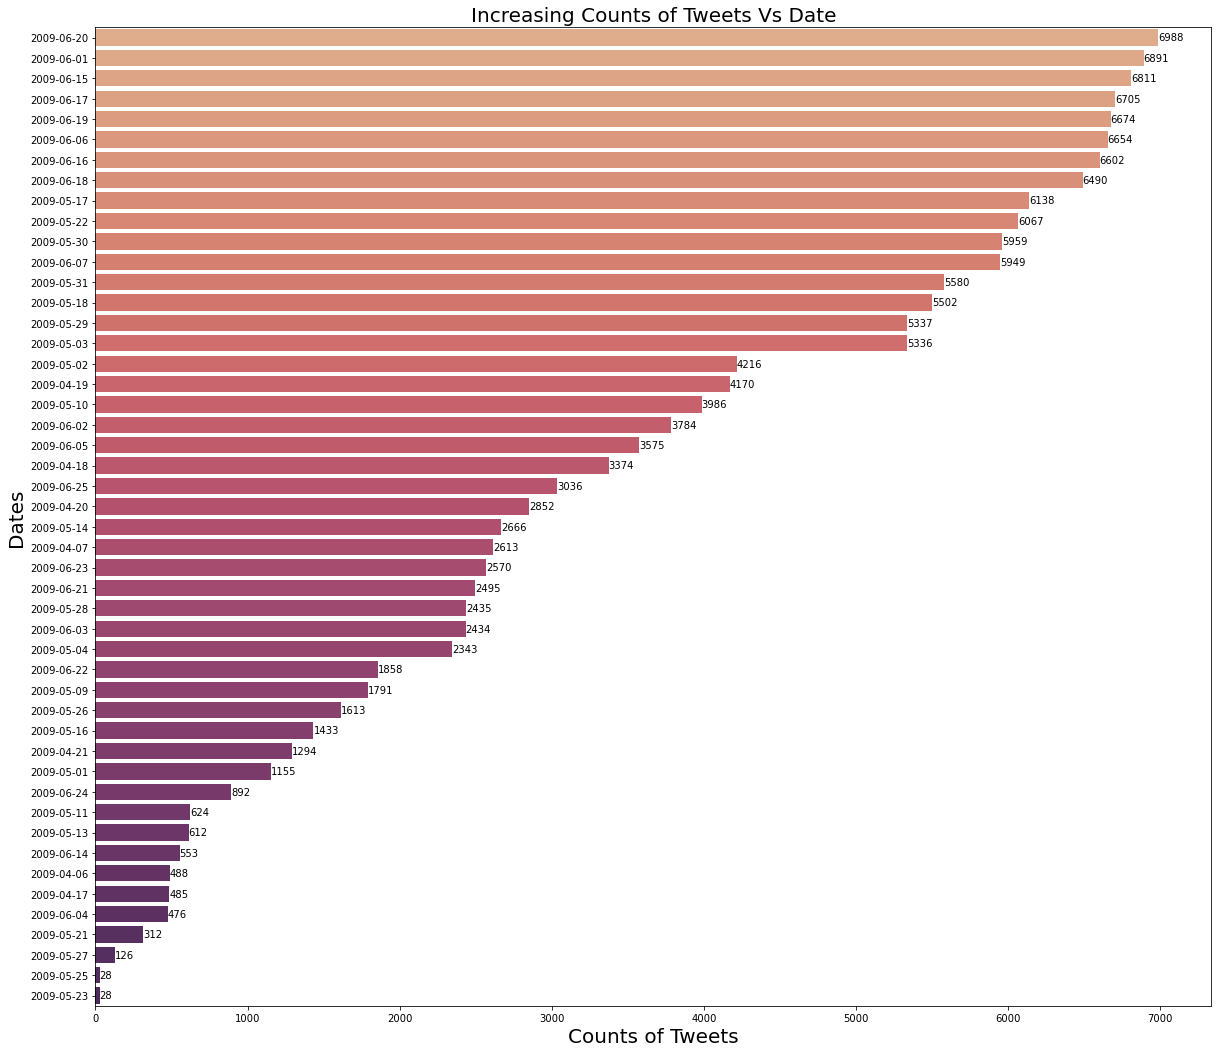

In [17]:
# Plotting the tweets with counts

plt.figure(figsize=(20,18))
show = sb.countplot(data = ens_learn, y = 'date',
                   palette='flare',
                   order = ens_learn.date.value_counts().index)

show.bar_label(show.containers[0])
show.set_title('Increasing Counts of Tweets Vs Date', size = '20')
plt.ylabel("Dates", size = '20')
plt.xlabel("Counts of Tweets", size = '20')
plt.show()

# Question 2

## Bag of Words 

In [18]:
# split the data into training and testing  
train, test = train_test_split(ens_learn, test_size=0.3, random_state=15)

In [19]:
# Build the BOW model using Tokenizer
victor = Tokenizer()
victor.fit_on_texts(train.stemming)

In [20]:
maxcount = ens_learn['stemming'].apply(lambda x: len(x.split())).max()

In [21]:
maxcount

35

- We will apply our modelling on the stemmed data and later on, we will do CNN and then compare the results.

In [22]:
# Training set
my_train = victor.texts_to_sequences(train.stemming)
# Test set
my_test = victor.texts_to_sequences(test.stemming)

In [23]:
X_train = pad_sequences(my_train, maxlen=maxcount, padding="post")
X_test = pad_sequences(my_test, maxlen=maxcount, padding="post")

y_train = train.target.values
y_test = test.target.values

In [24]:
X_train.shape

(112000, 35)

## Question 2+3) Modelling

In [25]:
# Making KNN Model
KNN = KNeighborsClassifier(n_neighbors=16).fit(X_train, y_train)
print (KNN)

KNeighborsClassifier(n_neighbors=16)


## 1) KNN  

In [26]:
KNN_predictions = KNN.predict(X_test)

## Accuracy 

- Following is the accuracy of our KNN model

In [27]:
# Checking the accuracy
KNN.score(X_test,y_test)

0.7640208333333334

## Classification Report 

In [28]:
print(classification_report(y_test,KNN_predictions))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86     36644
           4       0.52      0.04      0.07     11356

    accuracy                           0.76     48000
   macro avg       0.64      0.51      0.47     48000
weighted avg       0.71      0.76      0.68     48000



## Confusion Matrix 

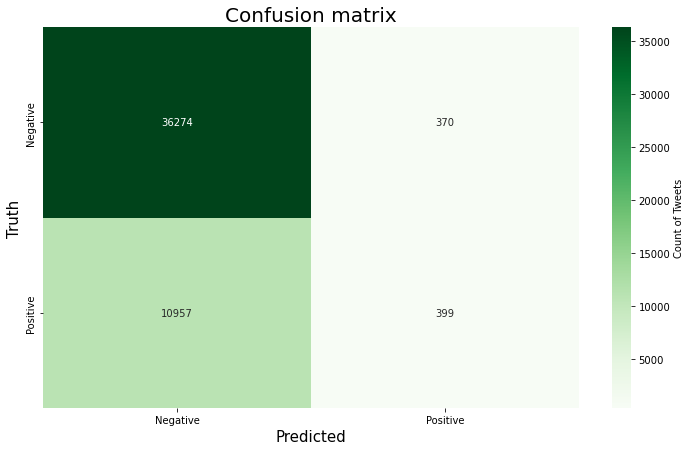

In [29]:
# Confusion Matrix
cm_KNN = confusion_matrix(y_test,KNN_predictions)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['Negative', 'Positive']
sb.heatmap(cm_KNN, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Count of Tweets'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

- This is the confusion matrix for our KNN Model

## 2)  Decision Tree

In [30]:
# Making Decision Tree Model
Dec_Tree = DecisionTreeClassifier(
    criterion='entropy', max_depth=4).fit(X_train, y_train)

In [31]:
Dec_Tree_predictions = Dec_Tree.predict(X_test)

## Accuracy 

- Below is the accuracy for our Decision Tree Model

In [32]:
# Checking the accuracy
Dec_Tree.score(X_test,y_test)

0.7679791666666667

## Classification Report 

In [33]:
print(classification_report(y_test,Dec_Tree_predictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     36644
           4       0.70      0.03      0.06     11356

    accuracy                           0.77     48000
   macro avg       0.73      0.51      0.47     48000
weighted avg       0.75      0.77      0.68     48000



## Confusion Matrix 

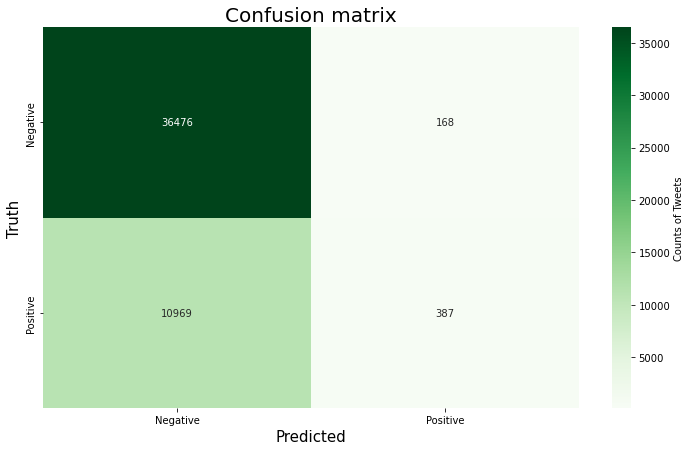

In [34]:
# Confusion Matrix
cm_Dec_Tree = confusion_matrix(y_test,Dec_Tree_predictions)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['Negative', 'Positive']
sb.heatmap(cm_Dec_Tree, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Counts of Tweets'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

- This is the confusion matrix for our Decision Tree Model

## 3) SVM 

In [35]:
# Building the SVM Model
SVM = svm.SVC(kernel='rbf').fit(X_train, (y_train))

In [36]:
SVM_predictions = SVM.predict(X_test)

## Accuracy 

- Following is the accuracy of our SVM Model. SVM models takes the longest time among all for the training and the outcomes.

In [37]:
SVM.score(X_test,y_test)

0.763375

## Classification Report 

In [38]:
print(classification_report(y_test,SVM_predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     36644
           4       0.00      0.00      0.00     11356

    accuracy                           0.76     48000
   macro avg       0.38      0.50      0.43     48000
weighted avg       0.58      0.76      0.66     48000



## Confusion Matrix

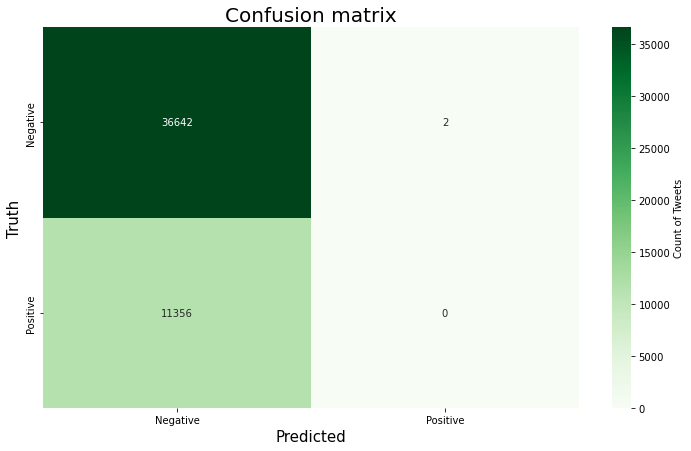

In [39]:
cm_svm = confusion_matrix(y_test,SVM_predictions)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['Negative', 'Positive']
sb.heatmap(cm_svm, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Count of Tweets'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

## Question 4 

## Word2Vec 

- Now we will use Word2Vec and then make the CNN model

In [40]:
from gensim.models import Word2Vec

In [42]:
texts_w2v = ens_learn.stemming.apply(tokenize).to_list()

w2v = Word2Vec(sentences = texts_w2v, window = 3,
               vector_size = X_train.shape[1], min_count = 5, workers = 4, sg = 1)

In [43]:
w2v

- Now we would decode our 0 as Ngative tweets, 2 as neutral and 4 as the positive ones and store them in the decode_sentiment function

In [44]:
decode = {0: "Negative", 2: "Neutral", 4: "Positive"}
def decode_sentiments(label):
    return decode[int(label)]

In [45]:
train.target.apply(lambda x: decode_sentiments(x))

985655    Positive
281720    Negative
64837     Negative
589260    Negative
474319    Negative
            ...   
426580    Negative
626932    Negative
360512    Negative
549056    Negative
463076    Negative
Name: target, Length: 112000, dtype: object

In [46]:
labels = train.target.unique().tolist()
labels.append('Neutral')

- First, a LabelEncoder object is created and fit on the target column of the train data. This is a preprocessing step that converts the labels in the target column into integer values. For example, if the target column contains the labels 'cat', 'dog', and 'bird', the LabelEncoder will convert these labels into the integers 0, 1, and 2, respectively.

- Next, the LabelEncoder is fit on the target column of the test data. This allows the encoder to learn the mapping between the labels and integer values for the test data as well.

- Then, the transform method is used to apply the label encoding to the target columns of both the train and test data. The resulting integer arrays are stored in the variables y_train and y_test, respectively.

- Finally, the reshape method is used to reshape the y_train and y_test arrays into a column vector shape with a single column and as many rows as needed. The -1 value for the number of rows tells NumPy to infer the number of rows based on the length of the data and the number of columns.

In [47]:

encode = LabelEncoder()
encode.fit(train.target.tolist())
encode.fit(test.target.tolist())

y_train = encode.transform(train.target.tolist())
y_test = encode.transform(test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (112000, 1)
y_test (48000, 1)


- After below code has been run, the embed array should contain the embedding vectors for the words in the vocabulary, with one row per word and one column per feature in the embedding space. The embed array can then be used as input to a machine learning model to capture the semantic meaning of the words in a text.

In [48]:
max_length = len(victor.word_index)+1
embed = np.zeros((max_length, X_train.shape[1]))
for word, i in victor.word_index.items():
  if word in w2v.wv:
    embed[i] = w2v.wv[word]
print(embed.shape)

(42425, 35)


## CNN Model 

In [49]:
cnn= models.Sequential()
cnn.add(Embedding(max_length, X_train.shape[1], 
                        weights= [embed], input_length= X_train.shape[1], trainable= False))
cnn.add(Dropout(0.5))
cnn.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
cnn.add(Dense(1, activation='sigmoid'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 35)            1484875   
                                                                 
 dropout (Dropout)           (None, 35, 35)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               54400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,539,376
Trainable params: 54,501
Non-trainable params: 1,484,875
_________________________________________________________________


In [50]:
cnn.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [51]:
remember = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0), EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [52]:
results = cnn.fit(X_train, y_train, batch_size=X_train.shape[1], epochs=15, validation_split=0.1, verbose=1)

Epoch 1/15
2880/2880 [==============================] - 120s 39ms/step - loss: 0.4999 - accuracy: 0.7747 - val_loss: 0.4601 - val_accuracy: 0.7882
Epoch 2/15
2880/2880 [==============================] - 112s 39ms/step - loss: 0.4815 - accuracy: 0.7824 - val_loss: 0.4503 - val_accuracy: 0.7965
Epoch 3/15
2880/2880 [==============================] - 111s 39ms/step - loss: 0.4741 - accuracy: 0.7841 - val_loss: 0.4440 - val_accuracy: 0.7963
Epoch 4/15
2880/2880 [==============================] - 107s 37ms/step - loss: 0.4696 - accuracy: 0.7860 - val_loss: 0.4410 - val_accuracy: 0.8014
Epoch 5/15
2880/2880 [==============================] - 111s 38ms/step - loss: 0.4657 - accuracy: 0.7876 - val_loss: 0.4445 - val_accuracy: 0.8026
Epoch 6/15
2880/2880 [==============================] - 113s 39ms/step - loss: 0.4633 - accuracy: 0.7882 - val_loss: 0.4425 - val_accuracy: 0.8013
Epoch 7/15
2880/2880 [==============================] - 110s 38ms/step - loss: 0.4598 - accuracy: 0.7902 - val_loss: 0

In [53]:
cnn_pred = cnn.predict(X_test)
cnn_pred = np.where(cnn_pred < 0.5, 0, 1)

1500/1500 [==============================] - 19s 12ms/step


## Accuracy 

- Below is the accuracy for the CNN Matix

In [60]:
cnn.evaluate(X_test,y_test)

1500/1500 [==============================] - 26s 17ms/step - loss: 0.4176 - accuracy: 0.8102


[0.4175514280796051, 0.8102291822433472]

## Classification Matrix 

In [55]:
print(classification_report(y_test,cnn_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     36644
           1       0.66      0.42      0.51     11356

    accuracy                           0.81     48000
   macro avg       0.75      0.67      0.70     48000
weighted avg       0.79      0.81      0.79     48000



## Confusion Matrix 

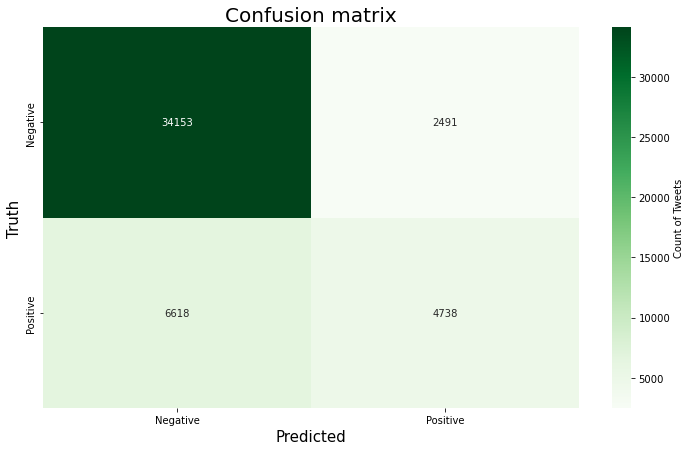

In [66]:
cm_cnn = confusion_matrix(y_test,cnn_pred)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['Negative', 'Positive']
sb.heatmap(cm_cnn, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Count of Tweets'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

## Results 

In [58]:
df_results = pd.DataFrame()
df_results['Algorithm'] = [
    'KNN', 'Decision Tree', 'SVM', 'CNN']
df_results['Score'] = [accuracy_score(KNN_predictions,y_test), accuracy_score(Dec_Tree_predictions,y_test),accuracy_score(SVM_predictions,y_test),accuracy_score(cnn_pred,y_test) ]
df_results.columns = ['Algorithm','Score']
df_results

,Algorithm,Score
0,KNN,0.755708
1,Decision Tree,0.759917
2,SVM,0.763375
3,CNN,0.810229


- As we can see that the accuracy of SVM is giving us the best accuracy from our dataframe among the first three. But when we compare the upper three models with CNN then CNN is giving us the best accuracy among all as shown.

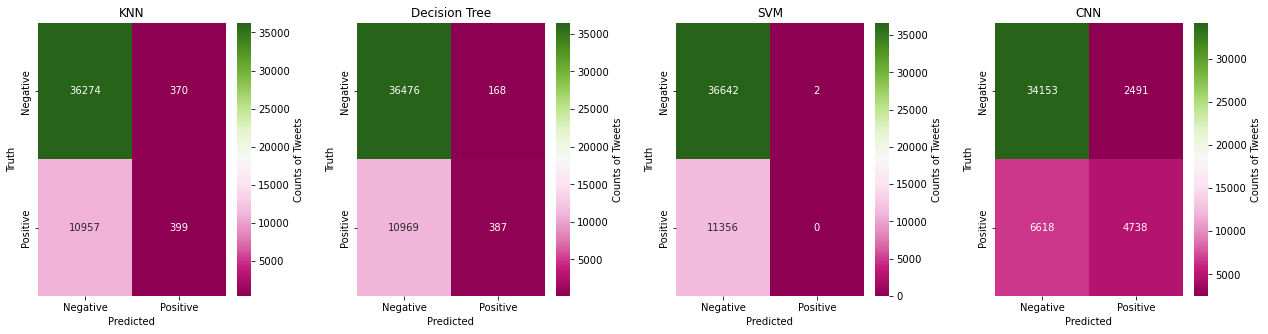

In [71]:
df_cm = pd.DataFrame()
df_cm['Name'] = ['KNN','Decision Tree','SVM','CNN']
df_cm['CM'] = [cm_KNN,cm_Dec_Tree,cm_svm,cm_cnn]
df_cm.columns = ['Name','CM']
df_cm = df_cm.transpose()

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(18, 5))
ax = ax.flatten()
sentiment_classes = ['Negative', 'Positive']
index=0
for i in df_cm.columns:
    sb.heatmap(df_cm[i][1], annot=True, ax=ax[index],cbar_kws={'label': 'Counts of Tweets'}, fmt='d',  
            xticklabels=sentiment_classes , yticklabels=sentiment_classes ,cmap="PiYG")
    ax[index].set_title(df_cm[i][0])
    ax[index].set_xlabel('Predicted')
    ax[index].set_ylabel('Truth')
    index += 1
plt.tight_layout(pad=2)
plt.show()

- If we see the balanced data among all the trained models then CNN is the best. There is a difference among all but CNN is having the least difference among these 3. The accuracy and the confusion matrix shows that CNN is most efficient